**Topics**  
Implementations of different types of agents including table-driven agent, simple reflex agent and, model-based agent using real life examples.

## Vaccum Cleaning Agent with locations A and B

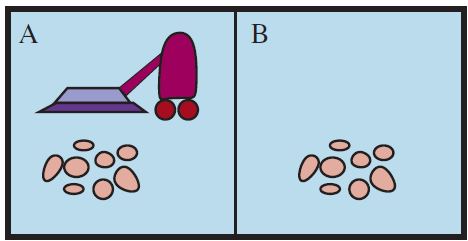

**Figure 2.2** A vacuum-cleaner world with just two locations. Each location can be clean or
dirty, and the agent can move left or right and can clean the square that it occupies. Different
versions of the vacuum world allow for different rules about what the agent can perceive,
whether its actions always succeed, and so on.

# Agent Description: Problem Formulation

**1. Objective:** A vacuum-cleaner world with just two locations. Each location can be clean or dirty, and the agent can move left or right and can clean the square that it occupies.
<br>**2. List of sensors:**
<br>Location, Status
<br>**3. Sensors' values:**
<br>Location -> {A, B}, <br>Status -> {Dirty, Clean}
<br>**4. List of actions:**
 <br>Clean Dirt,<br>Go Right, <br>Go Left
<br>**5. Agent function:** **perception --> action**
> (A, Clean) --> Go Right <br>
> (A, Dirty) --> Clean Dirt<br>
> (B, Clean) --> Go Left<br>
> (B, Dirty) --> Clean Dirt<br>



# Table driven agent

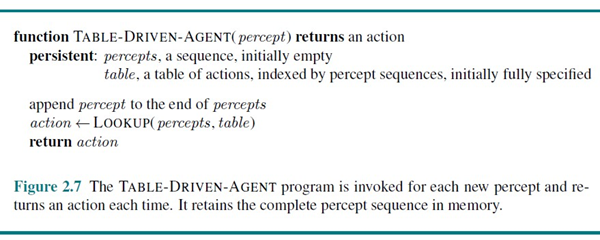

In [1]:
# Store the agent fucntion as a table
table={('A','Clean'):'Go Right',
       ('A','Dirty'):'Clean Dirt',
       ('B','Clean'):'Go Left',
       ('B','Dirty'):'Clean Dirt'}

In [2]:
percepts=[]  # to store percept history

def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = table[percept]
    return action

In [3]:

# Call the agent with a sample percept
print('Action Taken:', table_driven_agent(('A', 'Dirty')))
print('Action Taken:', table_driven_agent(('B', 'Clean')))


Perception Received: ('A', 'Dirty')
Action Taken: Clean Dirt
Perception Received: ('B', 'Clean')
Action Taken: Go Left


# Simple reflex agent

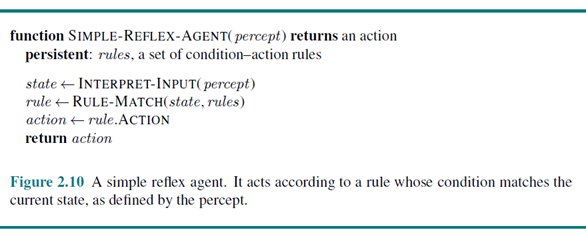

In [5]:
def simple_reflex_agent(location, condition):
    print('Perception Received:', (location, condition))
    if condition == 'Dirty':
        return 'Clean Dirt'
    elif location == 'A':
        return 'Go Right'
    else:
        return 'Go Left'

In [6]:
import random
# Initial percept
location = random.choice(['A', 'B'])
condition = random.choice(['Clean', 'Dirty'])

# Agent loop
while True:
    action = simple_reflex_agent(location, condition)
    print('Action Performed:', action)

    cmd = input('Type x to exit or any key to continue: ')
    if cmd.lower() == 'x':
        break

    # Update environment based on action
    if action == 'Go Right':
        location = 'B'
        condition = random.choice(['Clean', 'Dirty'])
    elif action == 'Go Left':
        location = 'A'
        condition = random.choice(['Clean', 'Dirty'])
    elif action == 'Clean Dirt':
        condition = 'Clean'

Perception Received: ('B', 'Clean')
Action Performed: Go Left
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Perception Received: ('B', 'Dirty')
Action Performed: Clean Dirt
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Perception Received: ('B', 'Dirty')
Action Performed: Clean Dirt



**Problem 1.**  A door agent, if any person is found within 1 meter, this agent will open the door. Otherwise, it will close the door automatically. The agent will check which side the person is standing on and it will always open the door on the opposite side of the person. Make an intelligent agent of above features.



### Agent Description:

**1. Objective:** A door agent will only open to the opposite side of the standing person within 1 meter.
<br>**2. List of sensors:**
<br>Two Proximity sensor
<br>**3. Sensors' values:**
<br>Sensor outside -> {Integer between 0 - 2}
<br>Sensor inside -> {Integer between 0 - 2}
<br>**4. List of actions:**
 <br>Open door to the inside
 <br>Open door to thte outside
<br>**5. Agent function:** **perception --> action**
<br>
>(Outside, <=1) --> Open door to the inside<br>
>(Inside, <=1) --> Open door to the outside<br>
>(Outside, >1) --> Close door<br>
>(Inside, >1) --> Close door<br>




In [ ]:
def door_agent(location, value):
    print('Perception Received', (location, value))
    if location == 'Outside' and int(value) <= 1:
        return 'Open door to the Inside'
    elif location == 'Inside' and int(value) <= 1:
        return 'Open door to the Outside'
    else:
        return 'Close door'

In [ ]:
import random

while True:
    location = random.choice(['Outside', 'Inside'])
    value = random.randint(0, 2)

    action = door_agent(location, value)
    print('Action Performed:', action)

    cmd = input('Type x to exit or any key to continue: ')
    if cmd.lower() == 'x':
        break

Perception Received ('inside', 0)
Action Performed: Open door to the outside
Perception Received ('outside', 2)
Action Performed: Close door
Perception Received ('outside', 4)
Action Performed: Close door
Perception Received ('inside', 3)
Action Performed: Close door


**Problem 2.** If the agent finds that there is no one in the room, it will turn off the lights and the fan. If any person is found in the room, the agent will check whether it is day or night. If night, it will turn on the light and fan both. If it is Day, then agent will turn on the fan only. Make an intelligent agent of above features.



### Agent Description:

**1. Objective:** If no one is in the room, it will turn off fan and light. If any person in the room and night turn on fan and light, if day turn on fan.
<br>**2. List of sensors:**
<br>Person detection sensor
<br>**3. Sensors' values:**
<br>Sensor -> {True, False}
<br>**4. List of actions:**
 <br>Turn OFF fan and light
 <br>Turn ON fan and light
 <br>Turn ON fan
 <br>Turn ON light
<br>**5. Agent function:** **perception --> action**
<br>

In [3]:
def switch_agent(person_detected, state):
    print('Perception Received:', (person_detected, state))
    if not person_detected:
        return 'Turn OFF fan and light'
    elif person_detected and state == 'Day':
        return 'Turn ON fan'
    elif person_detected and state == 'Night':
        return 'Turn ON fan and light'

In [ ]:
import random

while True:
    person_detected = random.choice([True, False])
    state = random.choice(['Day', 'Night'])

    action_2 = switch_agent(person_detected, state)
    print('Action Performed:', action_2)

    cmd = input('Type x to exit or any key to continue: ')
    if cmd.lower() == 'x':
        break

Perception Received: (False, 'Day')
Action Performed: Turn OFF fan and light
Perception Received: (True, 'Night')
Action Performed: Turn ON fan and light
Perception Received: (True, 'Day')
Action Performed: Turn ON fan
Perception Received: (False, 'Night')
Action Performed: Turn OFF fan and light


**Problem 3.** If a mars lander finds a rock in a specific place it needed to collect, then it will collect the rock. If it finds the same rock in a different place it will not pick it up as it considers that it already picked it up. Make an intelligent agent of above features.

### Agent Description:

**1. Objective:** If rock found in specific place pick it up, otherwise consider it as already picked up
<br>**2. List of sensors:**
<br>Rock detection sensor
<br>Location sensor
<br>**3. Sensors' values:**
<br>Rock detection -> {True, False}
<br>Lcoation sensor -> {1, 2, 3 ...}
<br>**4. List of actions:**
 <br>Pick up rock
 <br>Don't pick up rock, consider it picked up
<br>**5. Agent function:** **perception --> action**
<br>

In [15]:
def mars_lander(rock_detected, location):
    print('Perception Received:', (rock_detected, location))
    if rock_detected and location == 3:
        return 'Pick up rock'
    elif rock_detected and location != 3:
        'Do not pick up rock'

In [17]:
import random

while True:
    rock_detected = random.choice([True, False])
    rock_location = random.randint(1, 3)

    action_3 = mars_lander(rock_detected, rock_location)
    print('Action Performed:', action_3)

    cmd = input('Type x to exit or any key to continue: ')
    if cmd.lower() == 'x':
        break

Perception Received: (False, 3)
Action Performed: None
Perception Received: (False, 1)
Action Performed: None
Perception Received: (False, 1)
Action Performed: None
Perception Received: (False, 3)
Action Performed: None
Perception Received: (True, 2)
Action Performed: None
Perception Received: (False, 2)
Action Performed: None
Perception Received: (False, 2)
Action Performed: None
Perception Received: (True, 1)
Action Performed: None
Perception Received: (True, 3)
Action Performed: Pick up rock
